In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier

In [13]:
#deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
data = pd.read_csv("../ignoreland/creditcard.csv")
data.shape

(284807, 31)

In [16]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
X = data.drop(labels="Class", axis=1)
Y = data["Class"]

In [19]:
type(X)

pandas.core.frame.DataFrame

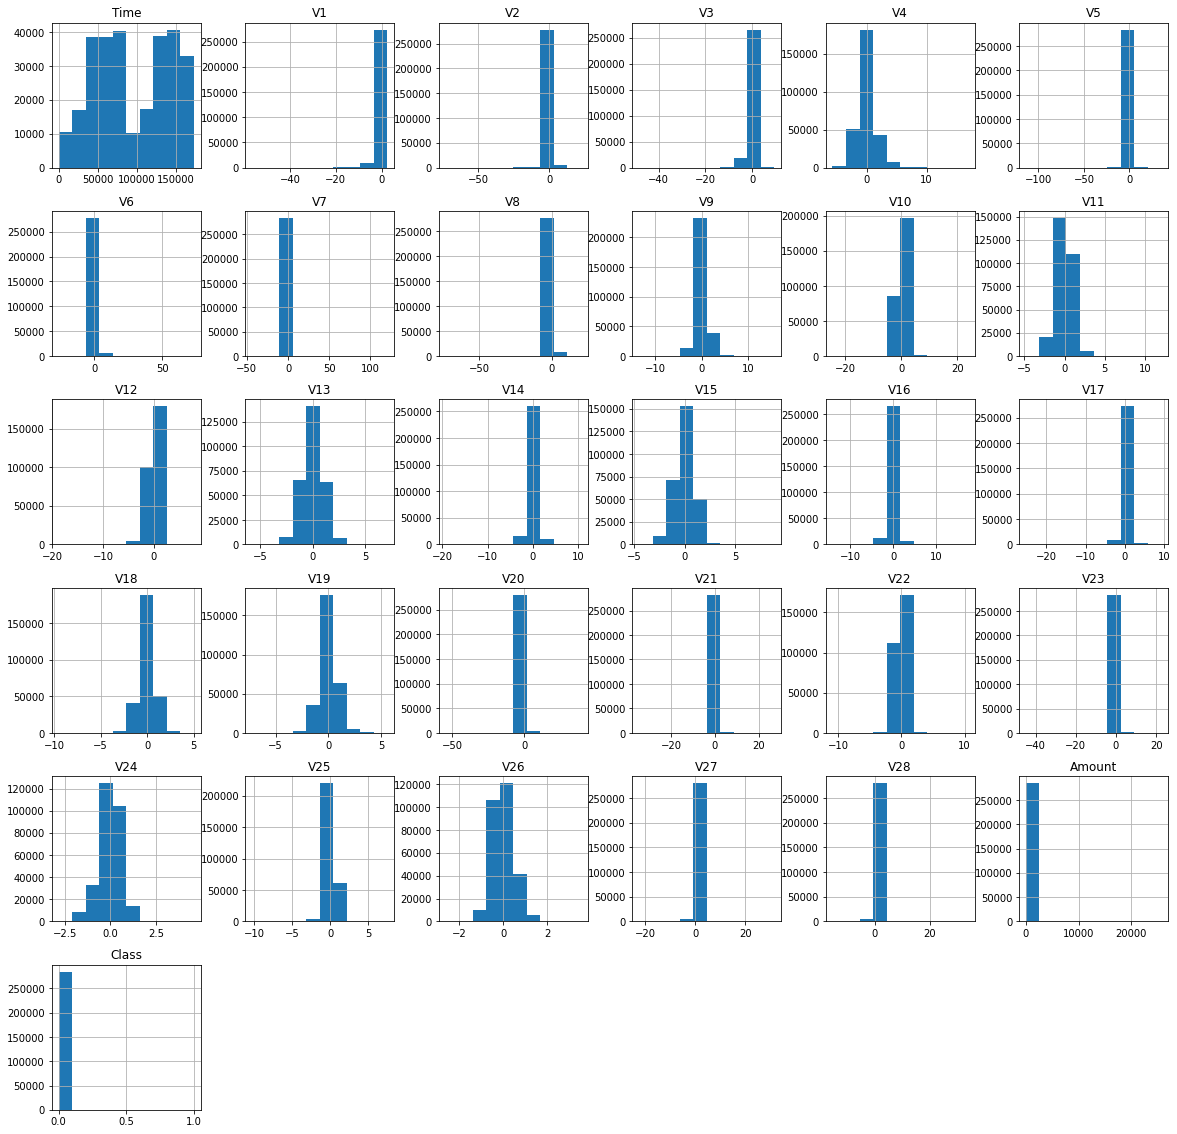

In [23]:
data.hist(figsize=(20,20))
plt.show()

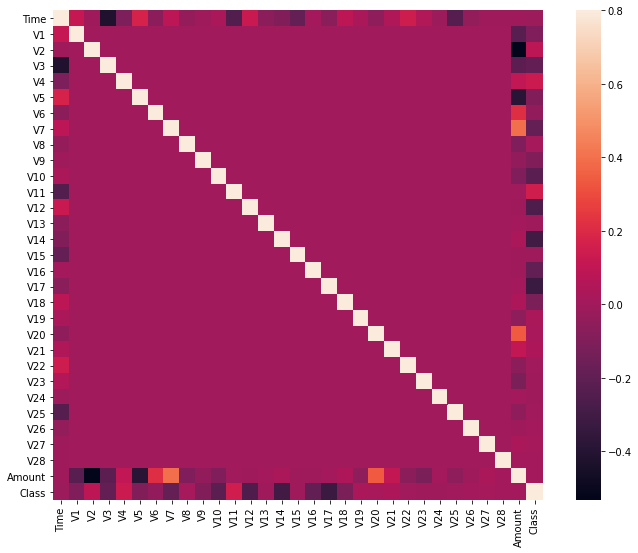

In [25]:
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Feature eng

In [26]:
SS = StandardScaler()  # sklearn preprocessing
X["normAmount"] = SS.fit_transform(X["Amount"].values.reshape(-1,1))
X = X.drop(["Time","Amount"], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [27]:
np.random.seed(10)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [29]:
type(X), type(Y)
# DF and Series, respectively

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [32]:
for _ in [x_train, x_test, y_train, y_test]:
    print(type(_), _.shape)

<class 'pandas.core.frame.DataFrame'> (227845, 29)
<class 'pandas.core.frame.DataFrame'> (56962, 29)
<class 'pandas.core.series.Series'> (227845,)
<class 'pandas.core.series.Series'> (56962,)


### We are going to try 
- with starting freqs,
- undersample negatives
- oversample positives

#### Trying a simple neural network

In [33]:
model = Sequential([
    Dense(units=16, input_dim=29, activation="relu"),
    Dense(units=24, activation="relu"),
    Dropout(0.5),
    Dense(units=20, activation = "relu"),
    Dense(units=24, activation = "relu"),
    Dense(units=1, activation = "sigmoid"),
])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [37]:
# import imblearn
from imblearn.under_sampling import NearMiss
# Other methods include: (Tomek link)(Condensed Nearest Neighbor Rule )(clustering)
# One-Sided Selection and the Neighborhood Cleaning Rule 
# https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/


In [43]:
sm = NearMiss(version=2) # instantiate

In [44]:
X_res, Y_res = sm.fit_resample(X, Y) # apply to X and Y, yielding resampled pair
type(X_res), type(Y_res)


(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [46]:
# check distribution after undersampling the negatives
pd.Series(Y_res).value_counts()

0    492
1    492
Name: Class, dtype: int64

In [50]:
def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
    
    # Placeholder to output training and test data.

    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test)
    cm = confusion_matrix(y_test, pred)
   # metrics =grid_result.gr
    print(pred)
    pickle.dump(grid_result,open(algo_name+".pkl",'wb'))
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)


In [ ]:
### Accuracy changes once dataset is balanced (predictably; it's part of the definition.)
## commentary further:  SVM misleading since..., to be returned to.


In [51]:
# LR:
# List of regularization entries
penalty = ['l1', 'l2']
# The space in which we're searching for regularization param (lambda) values
C = np.logspace(0, 4, 10)

# Collect hyperparam details into a dict
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_res,Y_res,'LR_US',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0]
Best Params : {'C': 7.742636826811269, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.94      0.95      0.94        95

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

Accuracy Score : 0.9441624365482234
Confusion Matrix : 
 [[96  6]
 [ 5 90]]


/Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.93899863        nan 0.93899057        nan 0.94026445
        nan 0.94026445        nan 0.93899057        nan 0.93899057
        nan 0.94026445        nan 0.94026445        nan 0.94026445
        nan 0.94026445]
  warnings.warn(
/Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [52]:
# XGBoost.  Simpler: just a dict with one entry, a list of estimator values  
param = {
    "n_estimators": [100, 500, 1000, 2000]
}
FitModel(X_res,Y_res,'XGB_US',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[13:29:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0]
Best Params : {'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       0.96      1.00      0.98        95

    accuracy                     

/Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [53]:
# Random forest takes same dict of list of estimator values
param = {
    "n_estimators": [100, 500, 1000, 2000]
}
FitModel(X_res,Y_res,'RF_US',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0]
Best Params : {'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.98      0.99      0.98        95

    accuracy                           0.98       197
   macro avg       0.98      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197

Accuracy Score : 0.9847715736040609
Confusion Matrix : 
 [[100   2]
 [  1  94]]


In [56]:
# Neural network: We are not using our FitModel function here
np.random.seed(10)
x_train,x_test,y_train,y_test = train_test_split(X_res,Y_res, test_size = 0.2)
x_train.shape

(787, 29)

In [57]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
53/53 [==============================] - 1s 1ms/step - loss: 0.2044 - accuracy: 0.9082
Epoch 2/5
53/53 [==============================] - 0s 1ms/step - loss: 0.1965 - accuracy: 0.9120
Epoch 3/5
53/53 [==============================] - 0s 1ms/step - loss: 0.2011 - accuracy: 0.9164
Epoch 4/5
53/53 [==============================] - 0s 1ms/step - loss: 0.1728 - accuracy: 0.9253
Epoch 5/5
53/53 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9222


In [58]:
print(model.evaluate(x_test, y_test))

7/7 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9543
[0.13775978982448578, 0.9543147087097168]


In [ ]:
### Now for oversampling (of positives) along with feature selection. 

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res_OS, Y_res_OS = sm.fit_resample(X, Y)

In [61]:
pd.Series(Y_res_OS).value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [62]:
###NN
np.random.seed(10)
x_train,x_test,y_train,y_test = train_test_split(X_res_OS,Y_res_OS, test_size = 0.2)
x_train.shape

(454904, 29)

In [67]:
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# model.fit(x_train,y_train,batch_size=15,epochs=5,validation_data=[x_test,y_test])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=15, validation_data=[x_test,y_test], epochs=5)
# Monitor val loss vs loss:  if the val loss exceeds loss, then it's overfitting

Epoch 1/5
30323/30327 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9981

ValueError: in user code:

    /Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1233 test_function  *
        return step_function(self, iterator)
    /Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1217 run_step  **
        outputs = model.test_step(data)
    /Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1183 test_step
        y_pred = self(x, training=False)
    /Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:204 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 29) dtype=float64>, <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>]


In [65]:
print(model.evaluate(x_test, y_test))

3554/3554 [==============================] - 3s 832us/step - loss: 0.0073 - accuracy: 0.9984
[0.007277789060026407, 0.9984260201454163]


In [66]:
# LR:
# List of regularization entries
penalty = ['l1', 'l2']
# The space in which we're searching for regularization param (lambda) values
C = np.logspace(0, 4, 10)

# Collect hyperparam details into a dict
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_res,Y_res,'LR_OS',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0]
Best Params : {'C': 7.742636826811269, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.94      0.95      0.94        95

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

Accuracy Score : 0.9441624365482234
Confusion Matrix : 
 [[96  6]
 [ 5 90]]


/Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.93899863        nan 0.93899057        nan 0.94026445
        nan 0.94026445        nan 0.93899057        nan 0.93899057
        nan 0.94026445        nan 0.94026445        nan 0.94026445
        nan 0.94026445]
  warnings.warn(
/Users/christophermartin/DocumentsNoCloud/repos/cmcode/deployml/predict_ccard/venvccard/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg